In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy
import scipy.io
from scipy import stats
from scipy import interpolate
from scipy.interpolate import interp1d
from derivative import dxdt
warnings.filterwarnings('ignore')

time    48.316667
dtype: float64 time    51.95
dtype: float64


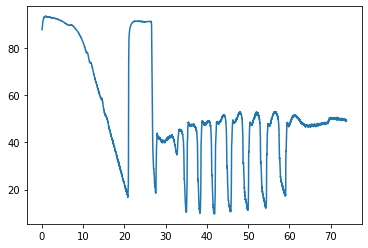

In [9]:
#RNA_o2 contains dissolved oxygen data from time =0 to time =73.8. 
#RNA_o2_time contains the sample points used by Kuang et al. 2014.
RNA_o2=pd.read_csv("/home/bguzman/jupyter/UI/RNAseq_o2curve.txt",sep="\t",names=["time","o2"])
RNA_o2_time=pd.read_csv("/home/bguzman/jupyter/UI/RNAseq_o2curve_points.txt",sep="\t",names=["time"])
plt.plot(RNA_o2["time"],RNA_o2["o2"])
print(RNA_o2_time.min(),RNA_o2_time.max())

In [10]:
#We only need to use the dO2 data at the 16 points contained in the df "RNA_o2_time". 
#These would be from time 48 to 52 (h).
RNA_o2=RNA_o2.loc[RNA_o2["time"]>=48]
RNA_o2=RNA_o2.loc[RNA_o2["time"]<=52]

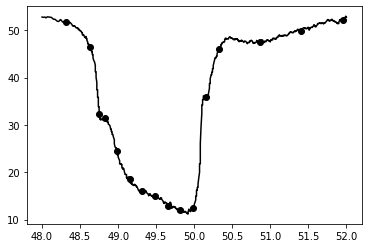

In [13]:
#Interpolation between the sampling times used by Kuang et. al (2014) and the df of dO2 with all the times.
x = RNA_o2["time"]
y = RNA_o2["o2"]
f = interp1d(x, y)
xnew = RNA_o2_time
ynew = f(xnew)   
plt.plot(x, y, '-', xnew, ynew, 'o',color="black")
plt.show()

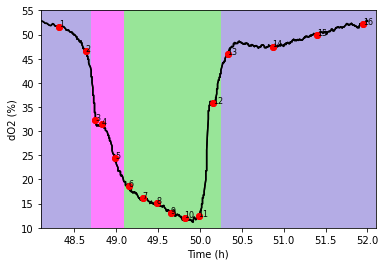

In [14]:
#PLOT
#x1 and x2 represent the interpolated points
x1=list(xnew["time"])
y1=ynew
list_time=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"]
fig, ax = plt.subplots()
ax.plot(x, y, 'k')

#background color margins
ax.margins(0) # remove default margins (matplotlib verision 2+)
ax.axvspan(48.1, 48.7, facecolor='slateblue', alpha=0.5)
ax.axvspan(48.7, 49.09, facecolor='fuchsia', alpha=0.5)
ax.axvspan(49.09, 50.25, facecolor='limegreen', alpha=0.5)
ax.axvspan(50.25, 53.3, facecolor='slateblue', alpha=0.5)

#add the 16 sample points
for i in range(16):
    plt.scatter(x1[i],y1[i],color='r',zorder=1)
    plt.text(x1[i],y1[i],list_time[i],fontsize = 8)

plt.plot(x,y,linestyle='solid',color='black')

plt.xlabel('Time (h)')
plt.ylabel('dO2 (%)')  #[mmol/gDWcélulas/h]
plt.xlim(48.1, 52.1)
plt.ylim(10, 55)
plt.plot(x1, y1, 'o',color="r")

plt.savefig('Fig1A.pdf')